In [42]:
import  keras
from  keras.layers import Activation, Dense, Dropout, Conv2D, \
                         Flatten, MaxPooling2D
from keras.models import Sequential
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

(128, 40) nozyczki_audacity-1.wav
(128, 40) nozyczki_audacity-10.wav
(128, 40) nozyczki_audacity-11.wav
(128, 40) nozyczki_audacity-12.wav
(128, 40) nozyczki_audacity-13.wav
(128, 40) nozyczki_audacity-14.wav
(128, 40) nozyczki_audacity-15.wav
(128, 40) nozyczki_audacity-16.wav
(128, 40) nozyczki_audacity-17.wav
(128, 40) nozyczki_audacity-18.wav
(128, 40) nozyczki_audacity-19.wav
(128, 40) nozyczki_audacity-2.wav
(128, 40) nozyczki_audacity-20.wav
(128, 34) nozyczki_audacity-3.wav
(128, 34) nozyczki_audacity-4.wav
(128, 34) nozyczki_audacity-5.wav
(128, 40) nozyczki_audacity-6.wav
(128, 40) nozyczki_audacity-7.wav
(128, 40) nozyczki_audacity-8.wav
(128, 40) nozyczki_audacity-9.wav


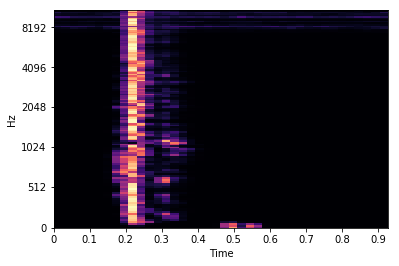

In [9]:
scissors = []
for file in os.listdir("nozyczki_pojedyncze/"):
##'nozyczki_pojedyncze/nozyczki_audacity-1.wav'
    y, sr = librosa.load(os.path.join("nozyczki_pojedyncze/", file))
    scissors.append(y)
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    print(ps.shape,file,)
    librosa.display.specshow(keras.utils.normalize(ps,axis=-1,order=2), y_axis='mel', x_axis='time')

In [10]:
#clear, sr = librosa.load("Tame_Impala_Let_It_Happen.wav")
clear=[]
for folder in ["muzyka"]:
    for file in os.listdir(folder):
        if(".wav" in file):
            probes,sr = librosa.load(folder+"/"+file)
            clear.extend(probes)
            print(len(clear))
clear=np.array(clear)

3138048
6220800
7657344


In [11]:
addition = np.array(1)
addition = np.append(addition,scissors[random.randint(0,19)])
while(len(addition)<len(clear)):
    addition = np.append(addition,scissors[random.randint(0,19)])
    print(len(addition))
noise = addition[0:len(clear)]+clear
librosa.output.write_wav('muzyka_szum.wav', noise, sr) 

40423
57768
77979
98190
118401
138612
158823
176168
196379
216590
236801
257012
277223
297434
317645
334990
355201
375412
395623
412968
430313
450524
470735
490946
511157
531368
551579
568924
589135
609346
626691
646902
667113
687324
707535
724880
745091
762436
782647
802858
823069
840414
857759
875104
895315
912660
932871
953082
973293
993504
1013715
1033926
1054137
1074348
1091693
1111904
1132115
1152326
1172537
1192748
1212959
1233170
1253381
1273592
1290937
1311148
1328493
1345838
1363183
1383394
1400739
1420950
1441161
1458506
1478717
1498928
1519139
1539350
1559561
1576906
1594251
1614462
1634673
1654884
1675095
1695306
1715517
1735728
1753073
1770418
1787763
1807974
1828185
1848396
1868607
1885952
1906163
1926374
1946585
1966796
1987007
2007218
2027429
2047640
2064985
2085196
2105407
2122752
2140097
2160308
2180519
2200730
2220941
2238286
2258497
2278708
2296053
2316264
2333609
2350954
2371165
2391376
2411587
2431798
2452009
2472220
2489565
2509776
2527121
2547332
2567543
258488

In [12]:
def saving_spectograms(array,sr,ln,file,ok):
    if(ok):
        folder = "ok"
    else:
        folder = "nok"
    #plt.figure()
    data = []
    i=0
    for probe in array:
        ps = librosa.feature.melspectrogram(y=probe, sr=sr,hop_length=ln)
        #print(ps.shape)
        np.save(folder+"/spectogram_"+file+"{0}".format(i),ps)
        data.append(ps)
        #librosa.display.specshow(ps)
        #plt.savefig(folder+"/spectogram_"+file+"{0}".format(i))
        i+=1
    print("Stworzono {0} spektogramów do folderu {1}".format(i,folder))
    return data

In [13]:
def sampling_for_spectograms(array,samples_full):
    array_reshaped = np.array([array[i*samples_full:(i+1)*samples_full] for i in range(len(array)//samples_full)])
    print(array_reshaped.shape)
    return array_reshaped

In [14]:
def music_to_spectograms(music,row_samples,full_samples,sr,ok,file="zwykly"):
    #reshaping
    music_reshaped = sampling_for_spectograms(music,full_samples)
    final = np.array(saving_spectograms(music_reshaped,sr,row_samples,file,ok))
    return final    

In [15]:
print(noise.shape,clear.shape)
time_duration = 20 ##ms
samples_for_spectogram = int(0.001*time_duration*sr*128)
print("we need {0} samples for {1} ms. spectogram 128x128 nedd {2}".format(0.001*time_duration*sr,time_duration,samples_for_spectogram))
ok = music_to_spectograms(clear,442,samples_for_spectogram,sr,True)
nok = music_to_spectograms(noise,442,samples_for_spectogram,sr,False)
print(ok.shape)

(7657344,) (7657344,)
we need 441.0 samples for 20 ms. spectogram 128x128 nedd 56448
(135, 56448)
Stworzono 135 spektogramów do folderu ok
(135, 56448)
Stworzono 135 spektogramów do folderu nok
(135, 128, 128)


# Data augmentation

In [31]:
#time streching
for strech in [0.81,1.07]:
    ok = music_to_spectograms(librosa.effects.time_stretch(clear, rate=strech),442,samples_for_spectogram,sr,True,file="time_strech_{0}".format(strech))
    nok = music_to_spectograms(librosa.effects.time_stretch(noise, rate=strech),442,samples_for_spectogram,sr,False,file="time_strech_{0}".format(strech))
print("done")

(167, 56448)
Stworzono 167 spektogramów do folderu ok
(167, 56448)
Stworzono 167 spektogramów do folderu nok
(126, 56448)
Stworzono 126 spektogramów do folderu ok
(126, 56448)
Stworzono 126 spektogramów do folderu nok
done


In [32]:
#Pich shift and vary
for n in [-1,-2,2,1,-2.5, -3.5, 2.5, 3.5]:
    ok = music_to_spectograms(librosa.effects.pitch_shift(clear,sr,n_steps=n),442,samples_for_spectogram,sr,True,file="wary_pich{0}".format(n))
    nok = music_to_spectograms(librosa.effects.pitch_shift(noise,sr,n_steps=n),442,samples_for_spectogram,sr,False,file="wary_pich_{0}".format(n))
print("done")

(135, 56448)
Stworzono 135 spektogramów do folderu ok
(135, 56448)
Stworzono 135 spektogramów do folderu nok
(135, 56448)
Stworzono 135 spektogramów do folderu ok
(135, 56448)
Stworzono 135 spektogramów do folderu nok
(135, 56448)
Stworzono 135 spektogramów do folderu ok
(135, 56448)
Stworzono 135 spektogramów do folderu nok
(135, 56448)
Stworzono 135 spektogramów do folderu ok
(135, 56448)
Stworzono 135 spektogramów do folderu nok
(135, 56448)
Stworzono 135 spektogramów do folderu ok
(135, 56448)
Stworzono 135 spektogramów do folderu nok
(135, 56448)
Stworzono 135 spektogramów do folderu ok
(135, 56448)
Stworzono 135 spektogramów do folderu nok
(135, 56448)
Stworzono 135 spektogramów do folderu ok
(135, 56448)
Stworzono 135 spektogramów do folderu nok
(135, 56448)
Stworzono 135 spektogramów do folderu ok
(135, 56448)
Stworzono 135 spektogramów do folderu nok
done


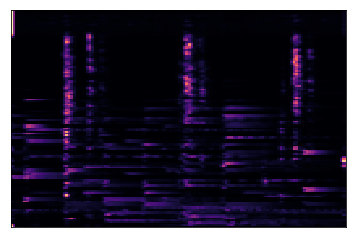

In [18]:
#data searching
plt.figure()
for file in ["ok/spectogram_zwykly10.npy","nok/spectogram_zwykly10.npy"]:
    spectogram = np.load(file)
    librosa.display.specshow(keras.utils.normalize(spectogram,axis=-1,order=2))
    plt.savefig("spektogramy/"+file[0:-4])

# Data preapering

In [19]:
D = [] # Dataset
for folder in ["ok","nok"]:
    for file in os.listdir(folder):
        spectogram = np.load(folder+"/"+file)
        if spectogram.shape != (128, 128): continue
        D.append( (keras.utils.normalize(spectogram,axis=-1,order=2), folder) )
print(len(D))

270


In [23]:
dataset = D
print(len(D))
print(len(D[0]))
print(len(D[0][0]))
random.shuffle(dataset)

train = dataset[:240]
test = dataset[240:]

x_train, y_train = zip(*train)
x_test, y_test = zip(*test)

# Reshape for CNN input
x_train = np.array([x.reshape( (128, 128, 1) ) for x in x_train])
x_test = np.array([x.reshape( (128, 128, 1) ) for x in x_test])

# One-Hot encoding for classes
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)
print(y_test)

270
2
128
[0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0]


In [53]:
Tensor_board = keras.callbacks.TensorBoard(log_dir='./logs')

In [24]:
model = Sequential()
input_shape=(128, 128, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(1, activation='sigmoid'))

In [54]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          epochs=5,
          batch_size=128,
          callbacks = [Tensor_board])

score = model.evaluate(x_test, y_test, batch_size=128)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
## tensorboard --logdir C:\Users\Jakub\Untitled Folder\logs --port=8080

Epoch 1/5
240/240 [==============================] - 18s 73ms/step - loss: 0.0095 - acc: 0.9958
Epoch 2/5
240/240 [==============================] - 13s 54ms/step - loss: 0.0512 - acc: 0.9708
Epoch 3/5
240/240 [==============================] - 12s 48ms/step - loss: 0.1065 - acc: 0.9500
Epoch 4/5
240/240 [==============================] - 12s 49ms/step - loss: 0.0170 - acc: 0.9917
Epoch 5/5
30/30 [==============================] - 1s 20ms/step
Test loss: 0.1729489415884018
Test accuracy: 0.9666666388511658


In [37]:
model.save("model.h5")
model.save_weights('my_model_weights.h5')

In [52]:
print(history.history)

{'loss': [0.019632197543978692, 0.037230267872413, 0.053639039397239685, 0.016307495658596356, 0.017400080617517234], 'acc': [0.987499988079071, 0.9791666746139527, 0.9833333214124044, 0.9958333214124043, 0.9958333333333333]}
